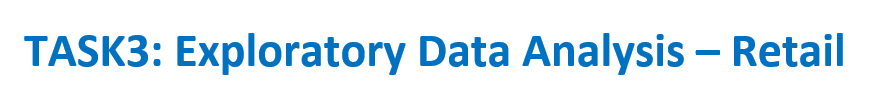

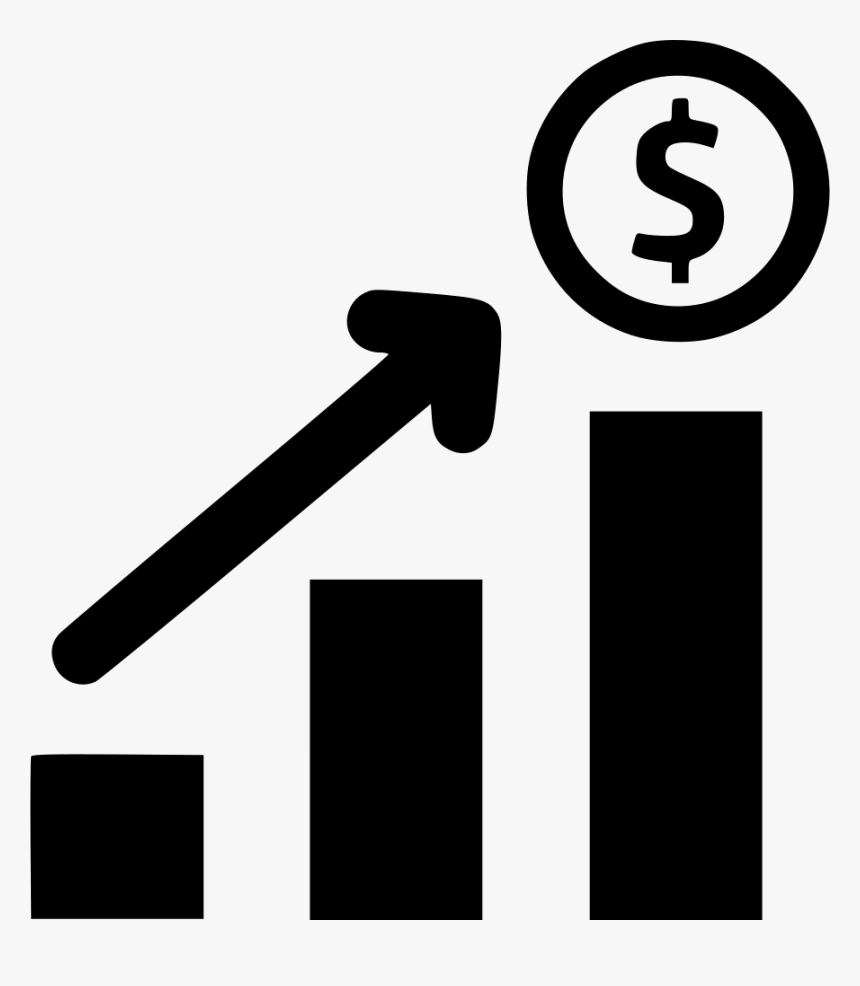

# Import Librairies

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data summurizing visualisation 

In [50]:
data=pd.read_csv('SampleSuperstore.csv')

In [51]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [52]:
data.shape

(9994, 13)

In [53]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [54]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [55]:
data1=data.drop(columns='Postal Code')

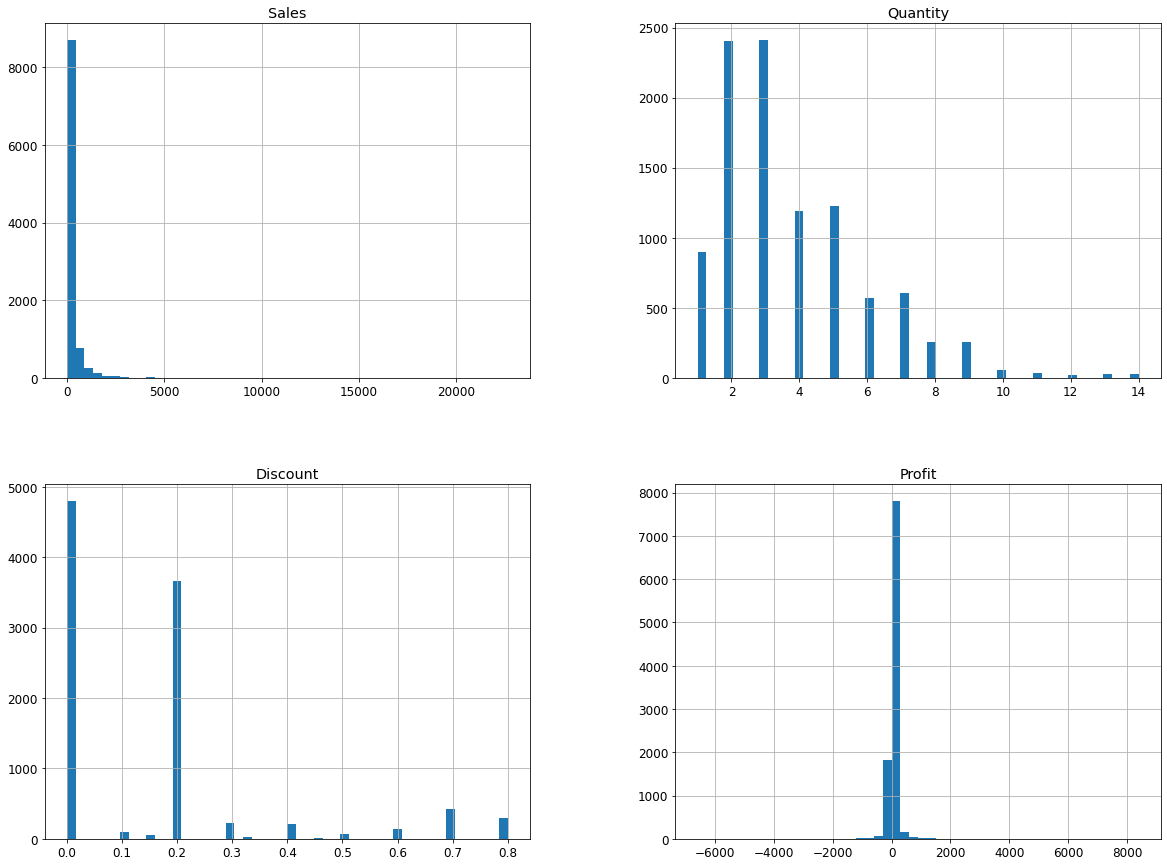

In [56]:
data1.hist(bins=50 ,figsize=(20,15))
plt.show();

# Sales distribution according to States

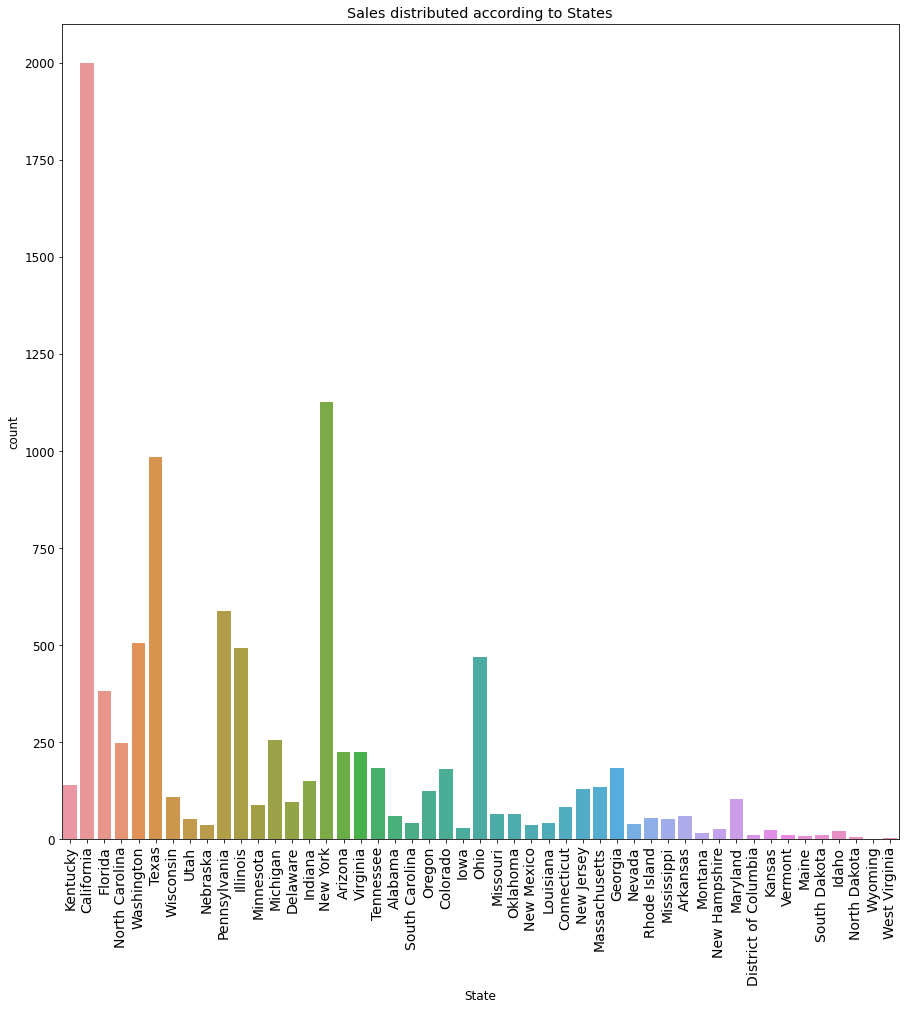

In [57]:
plt.figure(figsize=(15,15))
sns.countplot(x='State',data=data)
plt.xticks(rotation=90,fontsize=14)
plt.title('Sales distributed according to States')
plt.show()

# Sales distribution according to Ship Mode

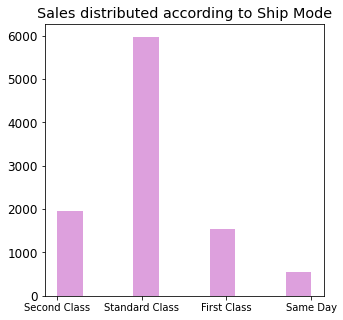

In [58]:
plt.figure(figsize=(5,5))
plt.hist(data['Ship Mode'],color='plum')
plt.xticks(fontsize=10)
plt.title('Sales distributed according to Ship Mode')
plt.show()

# Sales distribution according to Categories

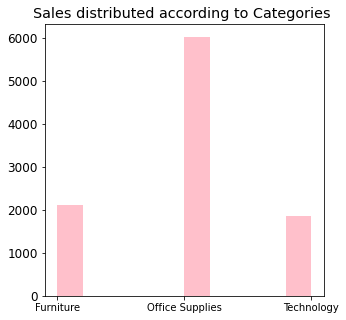

In [59]:
plt.figure(figsize=(5,5))
plt.hist(data['Category'],color='pink')
plt.xticks(fontsize=10)
plt.title('Sales distributed according to Categories ')
plt.show()


# Sales distribution according to Sub-Category

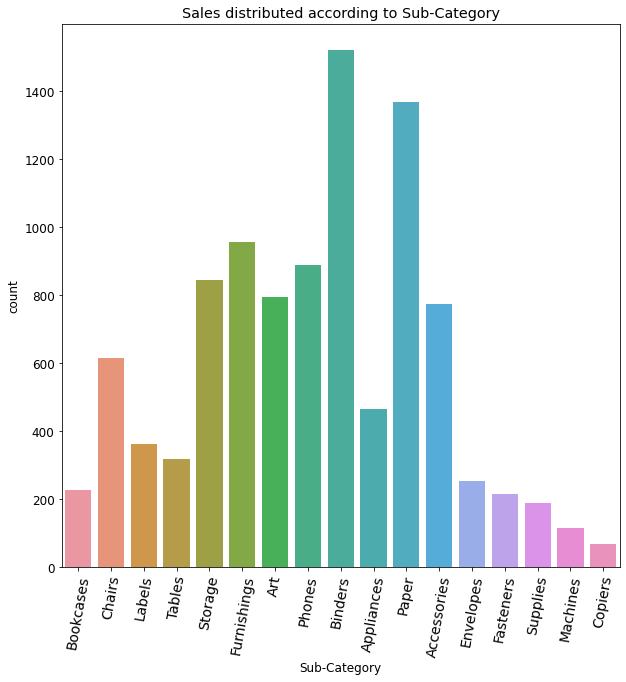

In [60]:
plt.figure(figsize=(10,10))
sns.countplot(x='Sub-Category',data=data)
plt.xticks(rotation=80,fontsize=14)
plt.title('Sales distributed according to Sub-Category')
plt.show()

In [61]:
a=data[['Category','Sub-Category','Quantity']].sort_values(by=['Quantity'],ascending=False)
a

,Category,Sub-Category,Quantity
6488,Office Supplies,Paper,14
8521,Furniture,Furnishings,14
5668,Office Supplies,Binders,14
9979,Office Supplies,Binders,14
8935,Technology,Accessories,14
...,...,...,...
3618,Technology,Phones,1
8676,Furniture,Furnishings,1
7346,Office Supplies,Art,1
3627,Technology,Accessories,1


Text(0.5, 1.0, 'Category vs Sales')

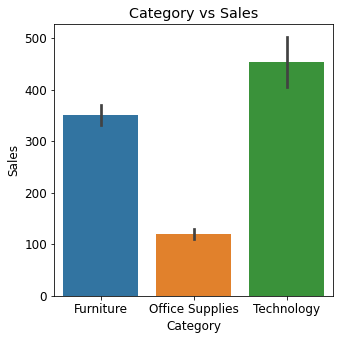

In [62]:
plt.figure(1, figsize=(5,5))
sns.barplot(x = 'Category', y='Sales', data=data)
plt.title('Category vs Sales')


Text(0.5, 1.0, 'Category vs Profit')

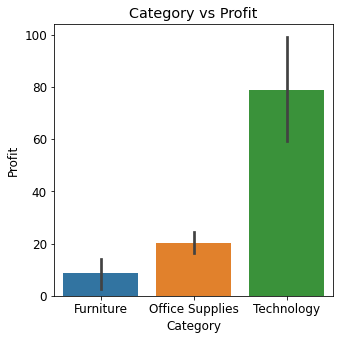

In [46]:
plt.figure(1, figsize=(5,5))
sns.barplot(x = 'Category', y='Profit', data=data)
plt.title('Category vs Profit')

Text(0.5, 1.0, 'Region vs Sales')

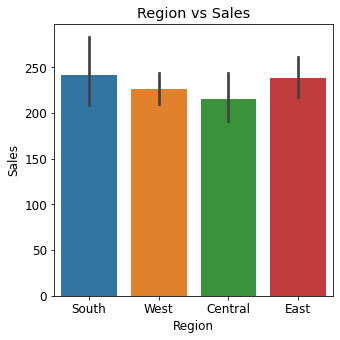

In [33]:
plt.figure(1, figsize=(5,5))
sns.barplot(x = 'Region', y='Sales', data=data)
plt.title('Region vs Sales')

Text(0.5, 1.0, 'Region vs Profit')

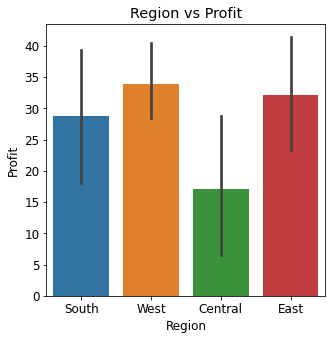

In [34]:
plt.figure(1, figsize=(5,5))
sns.barplot(x = 'Region', y='Profit', data=data)
plt.title('Region vs Profit')

In [15]:
import random
import matplotlib.colors as mcolors

# States Per Profits

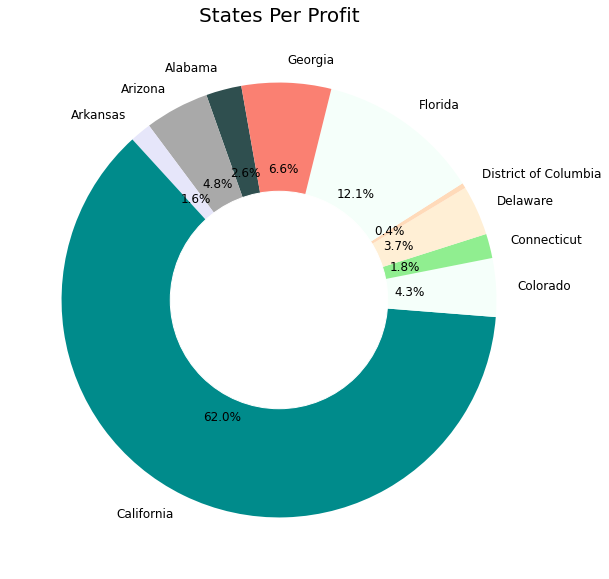

In [88]:
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 10)
d = data.groupby("State")["Sales"].sum().head(10)
plt.figure(figsize=(10,10))
plt.pie(d, labels=d.index, colors=colors,autopct='%1.1f%%',startangle=100)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("States Per Profit", fontsize=20)
plt.show()

# Profit per Category

In [79]:
Cat=pd.DataFrame()
Cat['Category']=data['Category']
Cat['Profit']=data.groupby('Category')['Profit'].transform('sum')
Cat.drop_duplicates(inplace=True)
Cat

,Category,Profit
0,Furniture,18451.2728
2,Office Supplies,122490.8008
7,Technology,145454.9481


# Profit per Sub-Category

In [80]:
Sub_cat=pd.DataFrame()
Sub_cat['Sub-Category']=data['Sub-Category']
Sub_cat['Profit']=data.groupby('Sub-Category')['Profit'].transform('sum')
Sub_cat.drop_duplicates(inplace=True)
Sub_cat

,Sub-Category,Profit
0,Bookcases,-3472.5560
1,Chairs,26590.1663
2,Labels,5546.2540
3,Tables,-17725.4811
4,Storage,21278.8264
5,Furnishings,13059.1436
6,Art,6527.7870
7,Phones,44515.7306
8,Binders,30221.7633
9,Appliances,18138.0054


# Areas with lowest Profit 

In [81]:
Areas=pd.DataFrame()
Areas['Region']=data['Region']

In [82]:
#Sum of profit per Region
Areas['Profit']=data.groupby('Region')['Profit'].transform('sum')
#removing the repetitive rows 
Areas.drop_duplicates(inplace=True)
Areas

,Region,Profit
0,South,46749.4303
2,West,108418.4489
14,Central,39706.3625
23,East,91522.7800


In [83]:
#Column city in areas contains each city  (  unique value in each row )
Areas=pd.DataFrame()
Areas['City']=data['City']

In [84]:
#Sum of profit per City
Areas['Profit']=data.groupby('City')['Profit'].transform('sum')
#removing the repetitive rows 
Areas.drop_duplicates(inplace=True)
Areas.head(10)

,City,Profit
0,Henderson,4911.8609
2,Los Angeles,30440.7579
3,Fort Lauderdale,-161.3551
12,Concord,-718.6389
13,Seattle,29156.0967
14,Fort Worth,298.7327
16,Madison,1123.6552
17,West Jordan,102.6723
18,San Francisco,17507.3854
21,Fremont,179.4696


There's Cities with a negatif income that means a loss

In [85]:
#Cities with  highest negatif income (loss) to the lowest
loss_area=Areas[Areas['Profit']<0].sort_values(by=['Profit'],ascending=True)
loss_area.head(10)

,City,Profit
23,Philadelphia,-13837.7674
34,Houston,-10153.5485
164,San Antonio,-7299.0502
786,Lancaster,-7239.0684
66,Chicago,-6654.5688
683,Burlington,-3622.8772
203,Dallas,-2846.5257
126,Phoenix,-2790.8832
103,Aurora,-2691.7386
434,Jacksonville,-2323.8350


In [86]:
loss_area['City'].unique()

array(['Philadelphia', 'Houston', 'San Antonio', 'Lancaster', 'Chicago',
       'Burlington', 'Dallas', 'Phoenix', 'Aurora', 'Jacksonville',
       'Memphis', 'Louisville', 'Medina', 'Round Rock', 'Knoxville',
       'Miami', 'Rockford', 'Clarksville', 'Bethlehem',
       'Colorado Springs', 'Pueblo', 'Cleveland', 'Nashville', 'Concord',
       'Lorain', 'Mesa', 'Greenville', 'Troy', 'Oswego', 'Waco',
       'Carrollton', 'Yuma', 'Tyler', 'Charlotte', 'Amarillo', 'Plano',
       'Marion', 'Tamarac', 'Dublin', 'Skokie', 'Toledo', 'Tampa',
       'Reading', 'Fort Collins', 'Bloomington', 'Denver', 'Park Ridge',
       'Pharr', 'Des Plaines', 'Allentown', 'Tigard', 'Bryan', 'Elmhurst',
       'Lakeland', 'Akron', 'Champaign', 'El Paso', 'Hialeah',
       'Highland Park', 'Parker', 'Mcallen', 'Fort Lauderdale', 'Redmond',
       'Naperville', 'Peoria', 'Mentor', 'Greensboro', 'College Station',
       'Normal', 'Wheeling', 'York', 'Irving', 'Littleton',
       'Buffalo Grove', 'Scottsdale'

In [87]:
print('There are {} weak Cities in diffrent States needs to be treated'.format(loss_area.shape[0]) )

There are 116 weak Cities in diffrent States needs to be treated
